In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
import os
import seaborn as sns
import random 
import dask
import babet as bb
from moarpalettes import get_palette
from cartopy import crs as ccrs
import cartopy.feature as cfeature
import matplotlib.patches as patches
from cmcrameri import cm
from matplotlib.ticker import FormatStrFormatter
from matplotlib.ticker import FuncFormatter, ScalarFormatter
from moarpalettes import get_palette

sns.set_theme(style="white")
sns.set_style("white")

random.seed(10)
# inidates = ['2023-10-11', '2023-10-15', '2023-10-17']
inidates = ['2023-10-15', '2023-10-17']
experiments = ['pi', 'curr', 'incr']

dask.config.set(**{'array.slicing.split_large_chunks': True})

In [2]:
sfc = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW_new_runs/single_level_jexp0_expid_CTL.nc')
sfc

<xarray.Dataset>
Dimensions:  (mem: 4, height: 1, rlat: 252, rlon: 276)
Coordinates:
    lon      (rlat, rlon) float64 ...
    lat      (rlat, rlon) float64 ...
  * rlon     (rlon) float64 -15.94 -15.83 -15.72 -15.61 ... 14.09 14.2 14.31
  * rlat     (rlat) float64 -15.41 -15.3 -15.19 -15.08 ... 11.98 12.09 12.2
  * height   (height) float64 0.0
    exp      object ...
  * mem      (mem) object 'inMA00' 'inMF24' 'inMF48' 'inMF72'
Data variables:
    precip   (mem, height, rlat, rlon) float32 ...
    mslp     (mem, height, rlat, rlon) float32 ...
    qvi      (mem, height, rlat, rlon) float32 ...
Attributes:
    standard_name:  precipitation_flux
    long_name:      Total Precipitative Flux
    units:          kg m-2 s-1
    cell_methods:   time: mean (1-hr averaged values)
    grid_mapping:   rotated_pole

In [3]:
tmp1 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW_ensemble/pgw_slp_PGW-1.nc').expand_dims(climate=["1870"])
bb.data.Data.clean_array_racmo(tmp1, 'msl')

<xarray.Dataset>
Dimensions:  (member: 4, climate: 1, time: 25, lat: 252, lon: 276)
Coordinates:
  * climate  (climate) <U4 '1870'
  * time     (time) datetime64[ns] 2023-10-19 2023-10-19T03:00:00 ... 2023-10-22
    height   float64 0.0
  * member   (member) int64 1 2 3 4
  * lat      (lat) float64 35.24 35.35 35.45 35.56 ... 60.87 60.97 61.07 61.17
  * lon      (lon) float64 -13.47 -13.34 -13.22 -13.09 ... 22.25 22.37 22.5
Data variables:
    msl      (member, climate, time, lat, lon) float32 1.01e+05 ... 1.016e+05
Attributes:
    regrid_method:  bilinear

In [2]:
bb.data.Data.get_pgw_ensemble()

Importing data from pre-existing file


<xarray.Dataset>
Dimensions:  (time: 25, member: 4, climate: 4, lat: 252, lon: 276)
Coordinates:
  * time     (time) datetime64[ns] 2023-10-19 2023-10-19T03:00:00 ... 2023-10-22
  * climate  (climate) object '1870' 'present' 'future1' 'future2'
    height   float64 ...
  * member   (member) int64 1 2 3 4
  * lat      (lat) float64 35.24 35.35 35.45 35.56 ... 60.87 60.97 61.07 61.17
  * lon      (lon) float64 -13.47 -13.34 -13.22 -13.09 ... 22.25 22.37 22.5
Data variables:
    msl      (member, climate, time, lat, lon) float32 ...
    tp       (member, climate, time, lat, lon) float32 ...
    t2m      (member, climate, time, lat, lon) float32 ...
Attributes:
    regrid_method:  bilinear

In [4]:
precip = bb.data.Data.clean_array_racmo(sfc, 'tp', 'precip')

In [3]:
bb.data.Data.get_pgw_new_runs()

Importing data from pre-existing file


<xarray.Dataset>
Dimensions:  (climate: 4, member: 4, lat: 252, lon: 276)
Coordinates:
    height   float64 ...
  * climate  (climate) object '1870' 'present' 'future1' 'future2'
    exp      object ...
  * member   (member) object 'inMA00' 'inMF24' 'inMF48' 'inMF72'
  * lat      (lat) float64 35.24 35.35 35.45 35.56 ... 60.87 60.97 61.07 61.17
  * lon      (lon) float64 -13.47 -13.34 -13.22 -13.09 ... 22.25 22.37 22.5
Data variables:
    msl      (climate, member, lat, lon) float32 ...
    tp       (climate, member, lat, lon) float32 ...
    qvi      (climate, member, lat, lon) float32 ...
Attributes:
    regrid_method:  bilinear

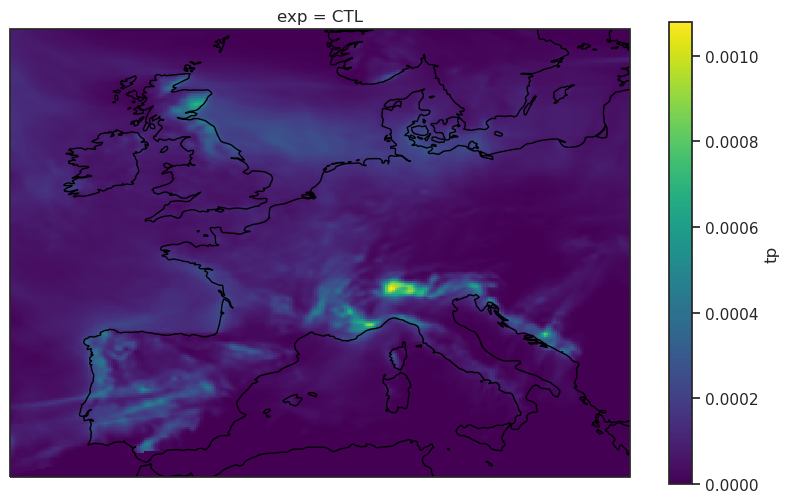

In [10]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
precip.tp.mean('member').plot(ax=ax)
ax.add_feature(cfeature.COASTLINE)

In [19]:
pl = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW_new_runs/pressure_level_jexp0_expid_CTL.nc')
pl

<xarray.Dataset>
Dimensions:       (mem: 4, rlat: 252, rlon: 276, nblock1: 40, nblock2: 400, bnds: 2, pressure: 5)
Coordinates:
    lon           (rlat, rlon) float64 ...
    lat           (rlat, rlon) float64 ...
  * rlon          (rlon) float64 -15.94 -15.83 -15.72 ... 14.09 14.2 14.31
  * rlat          (rlat) float64 -15.41 -15.3 -15.19 -15.08 ... 11.98 12.09 12.2
  * pressure      (pressure) float32 3e+04 5e+04 7e+04 8.5e+04 9.25e+04
    exp           object ...
  * mem           (mem) object 'inMA00' 'inMF24' 'inMF48' 'inMF72'
Dimensions without coordinates: nblock1, nblock2, bnds
Data variables:
    dir           (mem, rlat, rlon) float64 ...
    block1        (mem, nblock1) int32 ...
    block2        (mem, nblock2) int32 ...
    dtg           (mem) float64 ...
    date_bnds     (mem, bnds) float64 ...
    hms_bnds      (mem, bnds) float64 ...
    assigned      (mem) float64 ...
    rotated_pole  (mem) float64 ...
    t             (mem, pressure, rlat, rlon) float32 ...
    wp            (mem, pressure, rlat, rlon) float32 ...
Attributes:
    Conventions:   CF-1.4
    source:        RACMO2
    Domain:        KEXT12
    Experiment:    xR2v3-FC72-inMA00-v578-CTL-fECANFC
    institution:   Royal Netherlands Meteorological Institute (KNMI)
    CreationDate:  Wed Apr 10 13:54:37 2024
    comment:       asim2cdf: cpar=t0300, iwmo=11, ilvt=100, ilev=300, idh=1, ...
    title:         Temperature 300 hPa

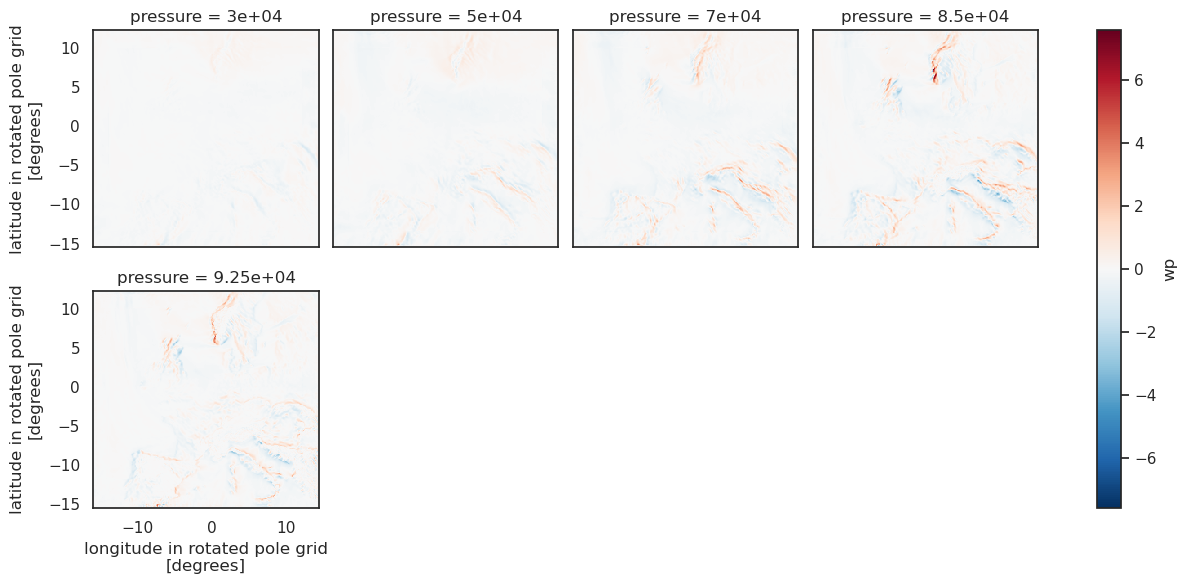

In [114]:
pl.wp.mean('mem').plot(col='pressure', col_wrap=4)

In [98]:
# check if file exists
if not os.path.exists('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW_new_runs/pgw_clean_dynamics_new_runs.nc'):
    # temperature
    tmp1 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW_new_runs/pressure_level_jexp4_expid_-1.5K.nc').expand_dims(climate=["1870"])
    tmp2 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW_new_runs/pressure_level_jexp0_expid_CTL.nc').expand_dims(climate=["present"])
    tmp3 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW_new_runs/pressure_level_jexp1_expid_+1.5K.nc').expand_dims(climate=["future1"])
    # tmp4 = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW_new_runs/pgw_qvi_fut2.nc').expand_dims(climate=["future2"])
    tmp = xr.concat([tmp1, tmp2, tmp3], dim="climate")
    tmp = bb.data.Data.regrid_racmo(tmp)

    ds = xr.Dataset(
        data_vars=dict(
            t=(["climate","member", "level", "lat", "lon"], tmp.t.values)),
        coords=dict(
            member=tmp.mem.values,
            level=tmp.pressure.values/100,
            lon=tmp.lon.values,
            lat=tmp.lat.values,
            climate=tmp.climate.values),
        attrs=dict(description="PGW data"))

    # vertical velocity
    pgw_dynamics = xr.merge([ds,
                    xr.Dataset(data_vars=dict(
                            w=(["climate", "member", "level", "lat", "lon"], tmp.wp.values)),
                            coords=dict(
                                    member=tmp.mem.values,
                                    level=tmp.pressure.values/100,
                                    lon=tmp.lon.values,
                                    lat=tmp.lat.values,
                                    climate=tmp.climate.values),
                            attrs=dict(description="PGW data"))], 
                    compat="override")

    # Save to netcdf
    pgw_dynamics.to_netcdf('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW_new_runs/pgw_clean_dynamics_new_runs.nc')
else:
    print('Importing data from pre-existing file')
    pgw_dynamics = xr.open_dataset('/gf5/predict/AWH019_ERMIS_ATMICP/Babet/DATA/PGW_new_runs/pgw_clean_dynamics_new_runs.nc')

Importing data from pre-existing file


In [99]:
pgw_dynamics

<xarray.Dataset>
Dimensions:  (climate: 3, member: 4, level: 5, lat: 252, lon: 276)
Coordinates:
  * member   (member) object 'inMA00' 'inMF24' 'inMF48' 'inMF72'
  * level    (level) float32 300.0 500.0 700.0 850.0 925.0
  * lon      (lon) float64 -13.47 -13.34 -13.22 -13.09 ... 22.25 22.37 22.5
  * lat      (lat) float64 35.24 35.35 35.45 35.56 ... 60.87 60.97 61.07 61.17
  * climate  (climate) object '1870' 'present' 'future1'
Data variables:
    t        (climate, member, level, lat, lon) float32 ...
    w        (climate, member, level, lat, lon) float32 ...
Attributes:
    description:  PGW data

In [100]:
# interpolate to more pressure levels
new_levels = [1000, 925, 850, 700, 600, 500, 400, 300, 250, 200, 150, 100]  # in hPa
pgw_dynamics = pgw_dynamics.interp(level=new_levels)

# calculate mass-weighted vertical velocity mean


In [101]:
import metpy.calc as mpcalc
from metpy.units import units

In [102]:
upper = 200
lower = 850
# convert to mm
vert_w = mpcalc.vertical_velocity(pgw_dynamics.w*units('Pa/s'), pgw_dynamics.level*units('hPa'), pgw_dynamics.t*units('K'))

# mass weighted mean
delta_p = vert_w.level.diff('level').rename('delta_p')
delta_p = delta_p.assign_coords(p=vert_w['level'].isel(level=slice(1, None)))
weighted_w  = vert_w.sel(level=slice(lower, upper)).isel(level=slice(1, None)) * delta_p
mass_weighted_average_w = (weighted_w.sum(dim='level') / delta_p.sum(dim='level')).rename('mass_weighted_w')

/home/e/ermis/nobackups/miniforge3/envs/babet-3-7-12_new/lib/python3.7/site-packages/pint/quantity.py:1309: RuntimeWarning: divide by zero encountered in true_divide
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


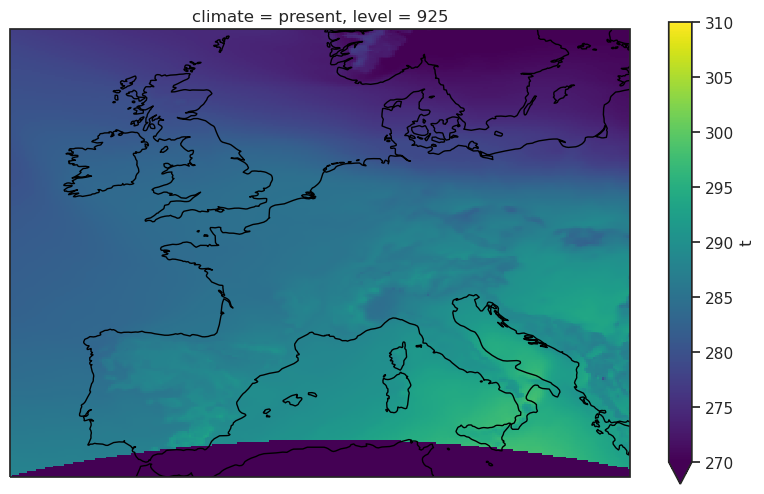

In [103]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
pgw_dynamics.t.sel(level=925, climate='present').mean(dim='member').plot(ax=ax, vmin=270, vmax=310)
ax.coastlines()

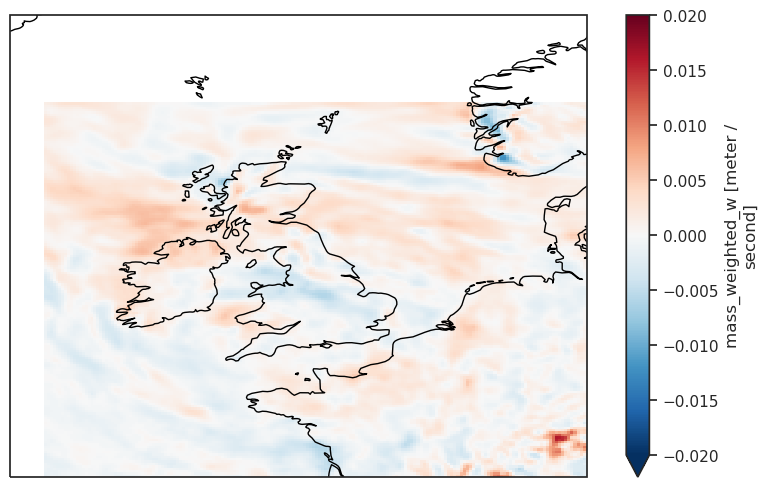

In [109]:
fig, ax = plt.subplots(figsize=(10, 6), subplot_kw={'projection': ccrs.PlateCarree()})
(mass_weighted_average_w.sel(climate='present')-mass_weighted_average_w.sel(climate='1870')).mean('member').plot(ax=ax, vmin=-0.02, vmax=0.02, cmap='RdBu_r')
ax.set_extent([-15, 10, 45, 65], crs=ccrs.PlateCarree())
ax.coastlines()

In [60]:
new_levels

[1000, 925, 850, 700, 600, 500, 400, 300, 250, 200, 150, 100]

In [61]:
vert_w.sel(level=850)

<xarray.DataArray (climate: 3, member: 4, lat: 252, lon: 276)>
<Quantity([[[[-2.15234644e-07 -2.15221224e-07 -2.15206497e-07 ... -2.20473227e-07
    -2.20447367e-07 -2.20422160e-07]
   [-2.15212051e-07  5.77244990e-03 -9.91310295e-04 ...  3.16726563e-03
     1.75825752e-03 -2.20373708e-07]
   [-2.15193730e-07  1.13030366e-02  9.10736080e-03 ...  4.61241884e-03
     1.88526608e-03 -2.20324275e-07]
   ...
   [-2.05493440e-07 -2.56150461e-03 -3.44605998e-03 ... -2.82824627e-03
     2.81802648e-03 -2.02168784e-07]
   [-2.05474115e-07 -5.31286890e-03 -2.38009377e-03 ...  3.13055337e-05
    -1.12776188e-03 -2.02153054e-07]
   [-2.05441720e-07 -2.05526839e-07 -2.05615552e-07 ... -2.02131465e-07
    -2.02134079e-07 -2.02130135e-07]]

  [[-2.25376196e-07 -2.25351856e-07 -2.25337804e-07 ... -2.30846907e-07
    -2.30818804e-07 -2.30789332e-07]
   [-2.25339857e-07  5.33995333e-03 -1.79571427e-03 ...  2.33151931e-03
     5.90111038e-04 -2.30737573e-07]
   [-2.25302492e-07  1.16299610e-02  9.18360444e-03 ...  4.73900216e-03
     1.38274433e-03 -2.30681341e-07]
...
   [ 6.73863059e-07 -3.17052909e-03 -6.01750562e-03 ... -2.02512217e-03
     4.51334319e-03  6.67062687e-07]
   [ 6.73785456e-07 -3.39774189e-03 -1.13839117e-03 ... -2.58575348e-05
    -7.69259517e-04  6.66993572e-07]
   [ 6.73680267e-07  6.73961957e-07  6.74197950e-07 ...  6.66917029e-07
     6.66908540e-07  6.66905358e-07]]

  [[-2.18212976e-07 -2.18202497e-07 -2.18195612e-07 ... -2.23038078e-07
    -2.23017773e-07 -2.22991258e-07]
   [-2.18175983e-07  5.32307754e-03 -2.30920915e-03 ...  1.55242137e-03
    -1.25549642e-04 -2.22954266e-07]
   [-2.18133412e-07  1.20622680e-02  9.90422122e-03 ...  3.73314120e-03
     1.61757154e-04 -2.22910061e-07]
   ...
   [-2.07363874e-07 -4.75072236e-03 -6.41941252e-03 ... -2.48597692e-03
     3.04837598e-03 -2.05423433e-07]
   [-2.07345879e-07 -4.98239831e-03 -1.59614677e-03 ...  6.58627035e-04
     4.32060477e-04 -2.05408356e-07]
   [-2.07315094e-07 -2.07393001e-07 -2.07477490e-07 ... -2.05382169e-07
    -2.05379555e-07 -2.05382822e-07]]]], 'meter / second')>
Coordinates:
  * member   (member) object 'inMA00' 'inMF24' 'inMF48' 'inMF72'
  * lon      (lon) float64 -13.47 -13.34 -13.22 -13.09 ... 22.25 22.37 22.5
  * lat      (lat) float64 35.24 35.35 35.45 35.56 ... 60.87 60.97 61.07 61.17
  * climate  (climate) <U7 '1870' 'present' 'future1'
    level    int64 850